In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../media/data/art/cksum.csv", error_bad_lines=False, header=None, usecols=[0,1])
df.head()

,0,1
0,delton.51056 > mba01s08-in-f3.1e100.net.ht...,cksum 0x021b (correct)
1,mba01s08-in-f3.1e100.net.https > delton.51...,cksum 0xd163 (correct)
2,delton.51056 > mba01s08-in-f3.1e100.net.ht...,cksum 0xfe02 (correct)
3,delton.51056 > mba01s08-in-f3.1e100.net.ht...,cksum 0x4338 (correct)
4,delton.51056 > mba01s08-in-f3.1e100.net.ht...,cksum 0xe35a (correct)


In [3]:
x = df.loc[0,1].split()[1]

In [4]:
x.encode("utf-8")

b'0x021b'

In [5]:
int(x,16)

539

In [6]:
int(0x021b)

539

In [7]:
df["value"] = df[1].apply(lambda x: x.split()[1]).apply(lambda x: int(x,16))
df = df.sample(len(df.index))
df.head()

,0,1,value
107313,delton.51575 > 185.162.184.34.52281: Flags...,cksum 0xb9e7 (correct),47591
50999,mba01s07-in-f1.1e100.net.https > delton.55...,cksum 0x4de3 (correct),19939
79957,delton.39886 > 104.16.18.94.https: Flags [.],cksum 0xe158 (correct),57688
62953,40.81.94.43.https > delton.45134: Flags [.],cksum 0xe66b (correct),58987
158694,delton.35423 > cpc88922-bele11-2-0-cust238...,cksum 0xbcd7 (correct),48343


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163582 entries, 107313 to 10029
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       163582 non-null  object
 1   1       163582 non-null  object
 2   value   163582 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [9]:
df.head()

,0,1,value
107313,delton.51575 > 185.162.184.34.52281: Flags...,cksum 0xb9e7 (correct),47591
50999,mba01s07-in-f1.1e100.net.https > delton.55...,cksum 0x4de3 (correct),19939
79957,delton.39886 > 104.16.18.94.https: Flags [.],cksum 0xe158 (correct),57688
62953,40.81.94.43.https > delton.45134: Flags [.],cksum 0xe66b (correct),58987
158694,delton.35423 > cpc88922-bele11-2-0-cust238...,cksum 0xbcd7 (correct),48343


In [10]:
df.loc[350,0]

'    delton.33558 > 162.159.153.4.https: Flags [.]'

In [11]:
import numpy as np
df["x"] = np.random.rand(len(df.index)) * 100000 * np.random.rand(len(df.index))
df["y"] = np.random.rand(len(df.index)) * 100000

In [12]:
np.random.rand(5)

array([0.03132858, 0.35162784, 0.90850779, 0.57950001, 0.66163157])

In [13]:
import matplotlib.pyplot as plt

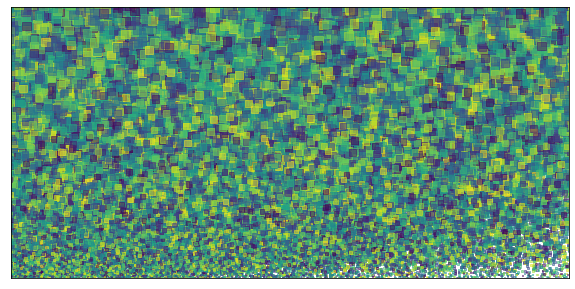

In [14]:
dfs = df.sample(len(df.index))

plt.figure(figsize=(10,5))

for i in list(dfs["value"].unique()):
    marker = np.random.choice(["x","o","<",">","^",","])

plt.xticks([])
plt.yticks([])

plt.xlim(1000,80000)
plt.ylim(1000,80000)
    
plt.scatter(dfs["x"], dfs["y"], marker=marker, c=dfs["value"], s=dfs["y"]/1e3, alpha=0.5)
plt.show();